In [1]:
import sys
import os

# Get the absolute path to the project directory
project_dir = os.path.abspath("..")

# Append the project directory to sys.path
if project_dir not in sys.path:
    sys.path.append(project_dir)

In [49]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import msgpack
import warnings
from dataclasses import asdict, is_dataclass, dataclass
import os
import msgpack
import json
import pickle
from pandas.api.types import is_datetime64_any_dtype

from src.common.AssetData import AssetData
from src.common.AssetDataService import AssetDataService
from src.databaseService.FileInOut import FileInOut 
from src.databaseService.OutsourceLoader import OutsourceLoader


In [3]:
import os
print(os.getcwd())


c:\Users\KILightTouch\Desktop\RandomOdyssey\notebooks


In [4]:
ticker="irm"
stock_info = yf.Ticker(ticker)
stockPrice=yf.download(ticker,start=dt.date.today()-pd.to_timedelta("7300d"), end=dt.date.today(),interval='1d')
stockPrice.to_dict()

c:\Users\KILightTouch\Desktop\RandomOdyssey\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


{'Open': {Timestamp('2004-09-15 00:00:00'): 20.357362747192383,
  Timestamp('2004-09-16 00:00:00'): 20.640789031982422,
  Timestamp('2004-09-17 00:00:00'): 20.49907684326172,
  Timestamp('2004-09-20 00:00:00'): 20.41281509399414,
  Timestamp('2004-09-21 00:00:00'): 20.45594596862793,
  Timestamp('2004-09-22 00:00:00'): 20.646949768066406,
  Timestamp('2004-09-23 00:00:00'): 20.301910400390625,
  Timestamp('2004-09-24 00:00:00'): 20.67159652709961,
  Timestamp('2004-09-27 00:00:00'): 20.640789031982422,
  Timestamp('2004-09-28 00:00:00'): 20.425138473510742,
  Timestamp('2004-09-29 00:00:00'): 20.425138473510742,
  Timestamp('2004-09-30 00:00:00'): 20.609981536865234,
  Timestamp('2004-10-01 00:00:00'): 20.825632095336914,
  Timestamp('2004-10-04 00:00:00'): 20.794824600219727,
  Timestamp('2004-10-05 00:00:00'): 20.86876106262207,
  Timestamp('2004-10-06 00:00:00'): 21.410966873168945,
  Timestamp('2004-10-07 00:00:00'): 21.386322021484375,
  Timestamp('2004-10-08 00:00:00'): 21.195316

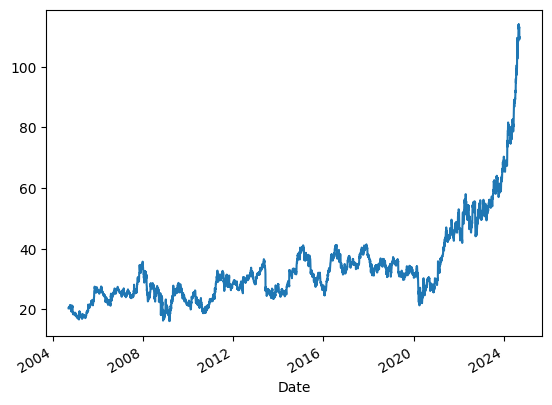

In [5]:
stockPrice["Open"].plot()
plt.show()

In [6]:
stock_hist=stock_info.history(period="max")
hist=stock_hist[["Open", "High", "Low", "Close"]]
div=stock_hist["Stock Splits"]
stock_hist["Stock Splits"]
stock_hist["Dividends"]

c:\Users\KILightTouch\Desktop\RandomOdyssey\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


Date
1996-02-01 00:00:00-05:00    0.0
1996-02-02 00:00:00-05:00    0.0
1996-02-05 00:00:00-05:00    0.0
1996-02-06 00:00:00-05:00    0.0
1996-02-07 00:00:00-05:00    0.0
                            ... 
2024-09-04 00:00:00-04:00    0.0
2024-09-05 00:00:00-04:00    0.0
2024-09-06 00:00:00-04:00    0.0
2024-09-09 00:00:00-04:00    0.0
2024-09-10 00:00:00-04:00    0.0
Name: Dividends, Length: 7200, dtype: float64

In [7]:
fullFinancials = stock_info.quarterly_financials
fullFinancials = fullFinancials.T
fullFinancials.index.name = 'Date'
fullFinancials.index = pd.to_datetime(fullFinancials.index)

fullFinancials["Total Revenue"]

Date
2024-06-30    1534409000.0
2024-03-31    1476863000.0
2023-12-31    1419829000.0
2023-09-30    1388175000.0
2023-06-30    1357936000.0
2023-03-31             NaN
2022-12-31             NaN
Name: Total Revenue, dtype: object

In [26]:
outsourceLoader = OutsourceLoader(outsourceOperator="yfinance")
asset: AssetData = outsourceLoader.load(ticker="irm")

assetVolDict = asset.volume.to_dict()
assetToVol = pd.Series(assetVolDict)

assetdict = AssetDataService.to_dict(asset)
#with open(os.path.join(ticker +".pkl"), 'wb') as f:
#    pickle.dump(assetdict, f)

stock_info = yf.Ticker("goog")
stock_info.ticker
stock_info.isin


c:\Users\KILightTouch\Desktop\RandomOdyssey\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


'ARDEUT116159'

In [10]:
with open(os.path.join(ticker + ".pkl"), 'rb') as f:
    assetdictread = pickle.load(f)


# Convert the dictionary back to an instance of the dataclass
loadedAsset = AssetDataService.from_dict(assetdictread)

(loadedAsset.EBITDA)

FileNotFoundError: [Errno 2] No such file or directory: 'irm.pkl'

In [14]:
asset.volume = None
#assetVolDict = asset.volume.to_dict() or {}
type(pd.DataFrame(None))

pandas.core.frame.DataFrame

In [55]:
outsourceLoader = OutsourceLoader(outsourceOperator="yfinance")
asset: AssetData = outsourceLoader.load(ticker="irm")
stock = yf.Ticker("aaaa")
df=stock.history(period="max", raise_errors=True)
df.index

c:\Users\KILightTouch\Desktop\RandomOdyssey\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


Exception: AAAA: No timezone found, symbol may be delisted

In [48]:
stock = yf.Ticker("aaaa")
outsourceLoader = OutsourceLoader(outsourceOperator="yfinance")

try:
    asset: AssetData = outsourceLoader.load(ticker="AAAA", raise_error=True)
except TypeError:
    pass
#type(stock.history(period="max"))

